<a href="https://colab.research.google.com/github/s-c-soma/Deeplearning-CMPE-258/blob/main/Assignment_3/Assignment_3_Part_C_2_Tensorflow(with_auto_differentiation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 Layer Neural Network (with relu nonlinearity) Using Tensorflow(with GradientTape)

# Implementation Details and Discussion

* Here, I have generated the 3d input and 2d output data first.
* Then I have built a 3 layer neural network with ReLU non linearity using Tensorflow Auto Differenciation
* Here the output has 2 neurons

## Steps: 
I have listed down the the formula and steps I have followed in each section:
- Initialized the parameters for a three-layer network 
- Used Tensorflow Gradient Tape
- Defined the 3layer architechture 
- Then training including back propagation
- Finally updated the parameters.
- Validation is also done
- 1.4304066896438599

## Equation of Multi Layer:
$$ Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]} $$

$$ A^{[l]} = g^{[l]}(Z^{[l]}) $$

Where $l$ is the `lth` layer.

## ExtraCredit:
* At the bottom I have plotted the data in 3d space. 
* To plot 3 dimensional data, I have reduced x into 2-d using TSNE

# Check if GPU/TPU available

In [1]:
!nvidia-smi

Mon Mar 22 00:42:13 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Colab environment

In [2]:
!python --version

Python 3.7.10


In [3]:
!pip list | grep tensor

tensorboard                   2.4.1         
tensorboard-plugin-wit        1.8.0         
tensorflow                    2.4.1         
tensorflow-datasets           4.0.1         
tensorflow-estimator          2.4.0         
tensorflow-gcs-config         2.4.0         
tensorflow-hub                0.11.0        
tensorflow-metadata           0.28.0        
tensorflow-probability        0.12.1        


In [4]:
!pip list | grep torch

torch                         1.8.0+cu101   
torchsummary                  1.5.1         
torchtext                     0.9.0         
torchvision                   0.9.0+cu101   


# Library

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

import matplotlib.pyplot as plt
from typing import Callable
from sklearn.manifold import TSNE
import pdb

# Generating Data: 3D Input :: 2D Output

In [6]:
# Generating data of 3 dim input and 2 dim output
n, d = 500, 3
x = tf.random.uniform(minval=-1, maxval=1, shape = (n, d))
x2 = tf.cast(x**2, tf.float32)
weights_true = tf.cast(tf.constant([[5,1,5],[1,2,1]]), tf.float32)
bias_true = tf.cast(tf.constant([1,2]), tf.float32)
y_true = tf.matmul(x2, weights_true, transpose_b=True) + tf.matmul(x,weights_true,transpose_b=True) + bias_true

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

x: (500, 3), weights: (2, 3), bias: (2,), y: (500, 2)


# Building Multi Layer NN using GradientTape: 3 Layer


## Linear Layer

In [7]:

class Linear(Layer):
  """y = w.x + b"""

  def __init__(self, units=32):
      super(Linear, self).__init__()
      self.units = units

  def build(self, input_shape):
      self.w = self.add_weight(shape=(input_shape[-1], self.units),
                               initializer='random_normal',
                               trainable=True)
      self.b = self.add_weight(shape=(self.units,),
                               initializer='random_normal',
                               trainable=True)

  def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b

## Model Class Architecture

In [8]:
class MLP(Layer):
    """Simple stack of Linear layers."""

    def __init__(self):
        super(MLP, self).__init__()
        self.linear_1 = Linear(20)
        self.linear_2 = Linear(10)
        self.linear_3 = Linear(2)

    def call(self, inputs):
        x = self.linear_1(inputs)
        x = tf.nn.relu(x)
        x = self.linear_2(x)
        x = tf.nn.relu(x)
        return self.linear_3(x)

# Model Training and Validation 

In [9]:
# Training
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
mse_loss_fn = tf.keras.losses.MeanSquaredError()
loss_metric = tf.keras.metrics.Mean()

dataset = tf.data.Dataset.from_tensor_slices((x, y_true))
dataset = dataset.shuffle(buffer_size=1).batch(30)

epochs = 2000
mlp = MLP()
# Iterate over epochs.
for epoch in range(epochs):

    # Iterate over the batches of the dataset.
    for step, (x_batch, y_batch) in enumerate(dataset):
        with tf.GradientTape() as tape:
            # Forward Pass
            y_pred_batch = mlp(x_batch)
            # Compute loss
            loss = mse_loss_fn(y_batch, y_pred_batch)
            loss += sum(mlp.losses)  # Add regularization loss

        grads = tape.gradient(loss, mlp.trainable_weights) # Use autograd
        optimizer.apply_gradients(zip(grads, mlp.trainable_weights)) # Update learnable parameter

        loss_metric(loss)
    if epoch % 20 == 0:
      print(f'Epoch {epoch}, loss {loss_metric.result()}')

Epoch 0, loss 29.961795806884766
Epoch 20, loss 25.014604568481445
Epoch 40, loss 21.54381561279297
Epoch 60, loss 18.857736587524414
Epoch 80, loss 16.840343475341797
Epoch 100, loss 14.912859916687012
Epoch 120, loss 13.075273513793945
Epoch 140, loss 11.661016464233398
Epoch 160, loss 10.574856758117676
Epoch 180, loss 9.71330738067627
Epoch 200, loss 9.008718490600586
Epoch 220, loss 8.415257453918457
Epoch 240, loss 7.9007134437561035
Epoch 260, loss 7.444389820098877
Epoch 280, loss 7.034102916717529
Epoch 300, loss 6.663591384887695
Epoch 320, loss 6.328906059265137
Epoch 340, loss 6.026809215545654
Epoch 360, loss 5.753900051116943
Epoch 380, loss 5.506921768188477
Epoch 400, loss 5.28286075592041
Epoch 420, loss 5.078983306884766
Epoch 440, loss 4.892813205718994
Epoch 460, loss 4.722171306610107
Epoch 480, loss 4.565209865570068
Epoch 500, loss 4.420306205749512
Epoch 520, loss 4.286116600036621
Epoch 540, loss 4.161453723907471
Epoch 560, loss 4.045313358306885
Epoch 580, lo

# Visualization: Training Data and Prediction

## Plot:: Generated Data

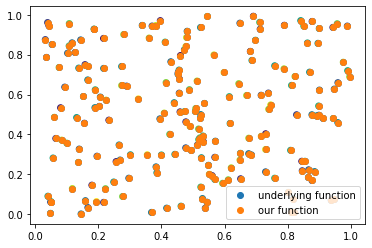

In [13]:
# # # Make non-linear data, using 3 dimensional input data and 2 output neurons
n = 200
d1 = 3
d2 = 2
input_dim = 3
output_dim = 2
learning_rate = 0.01
# This is our weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))
x = tf.Variable(tf.random.uniform(shape=(n, d1)))
y = tf.Variable(tf.random.uniform(shape=(n, d2)))

y_true = tf.matmul(tf.pow(x,2), w) + tf.matmul(x, w) + b
plt.scatter(x[:, 0], x[:, 1], c=y[:, 0])
plt.scatter(x[:, 0], x[:, 1], label='underlying function')
if y_true is not None:
  plt.scatter(x[:, 0], x[:, 1], label='our function')
  plt.legend()

## ExtraCredit: t-SNE 3D Plot

In [11]:
def plot_intereactive_3d(x, y, y_pred=None):
  import plotly.graph_objects as go

  fig = go.Figure()
  fig.add_trace(go.Scatter3d(x = x[:,0],
                    y = x[:,1],
                    z = y.reshape([-1]),
                    opacity=0.5, mode='markers', name='Underlying Function'
                    ))
 
  if y_pred is not None:
    fig.add_trace(go.Scatter3d(x = x[:,0],
                   y = x[:,1],
                   z = y_pred.reshape([-1]),
                   opacity=0.5, mode='markers', name='Predicted Function'
                  ))
    
  fig.update_layout(scene = dict(
                    xaxis_title='X1',
                    yaxis_title='X2',
                    zaxis_title='Y'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
  fig.show()

In [ ]:
from sklearn.manifold import TSNE
X_reduced = TSNE(n_components=2).fit_transform(x)
y_true_reduced = TSNE(n_components=1).fit_transform(y_true)
y_pred_reduced = TSNE(n_components=1).fit_transform(model(x))
print(f'X_reduced: {X_reduced.shape}, y_true_reduced: {y_true_reduced.shape}, y_pred_reduced: {y_pred_reduced.shape}')
plot_intereactive_3d(X_reduced,y_true_reduced,y_pred_reduced)

X_reduced: (500, 2), y_true_reduced: (500, 1), y_pred_reduced: (500, 1)
